In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Heart_Disease_data.csv')
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [5]:
data.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


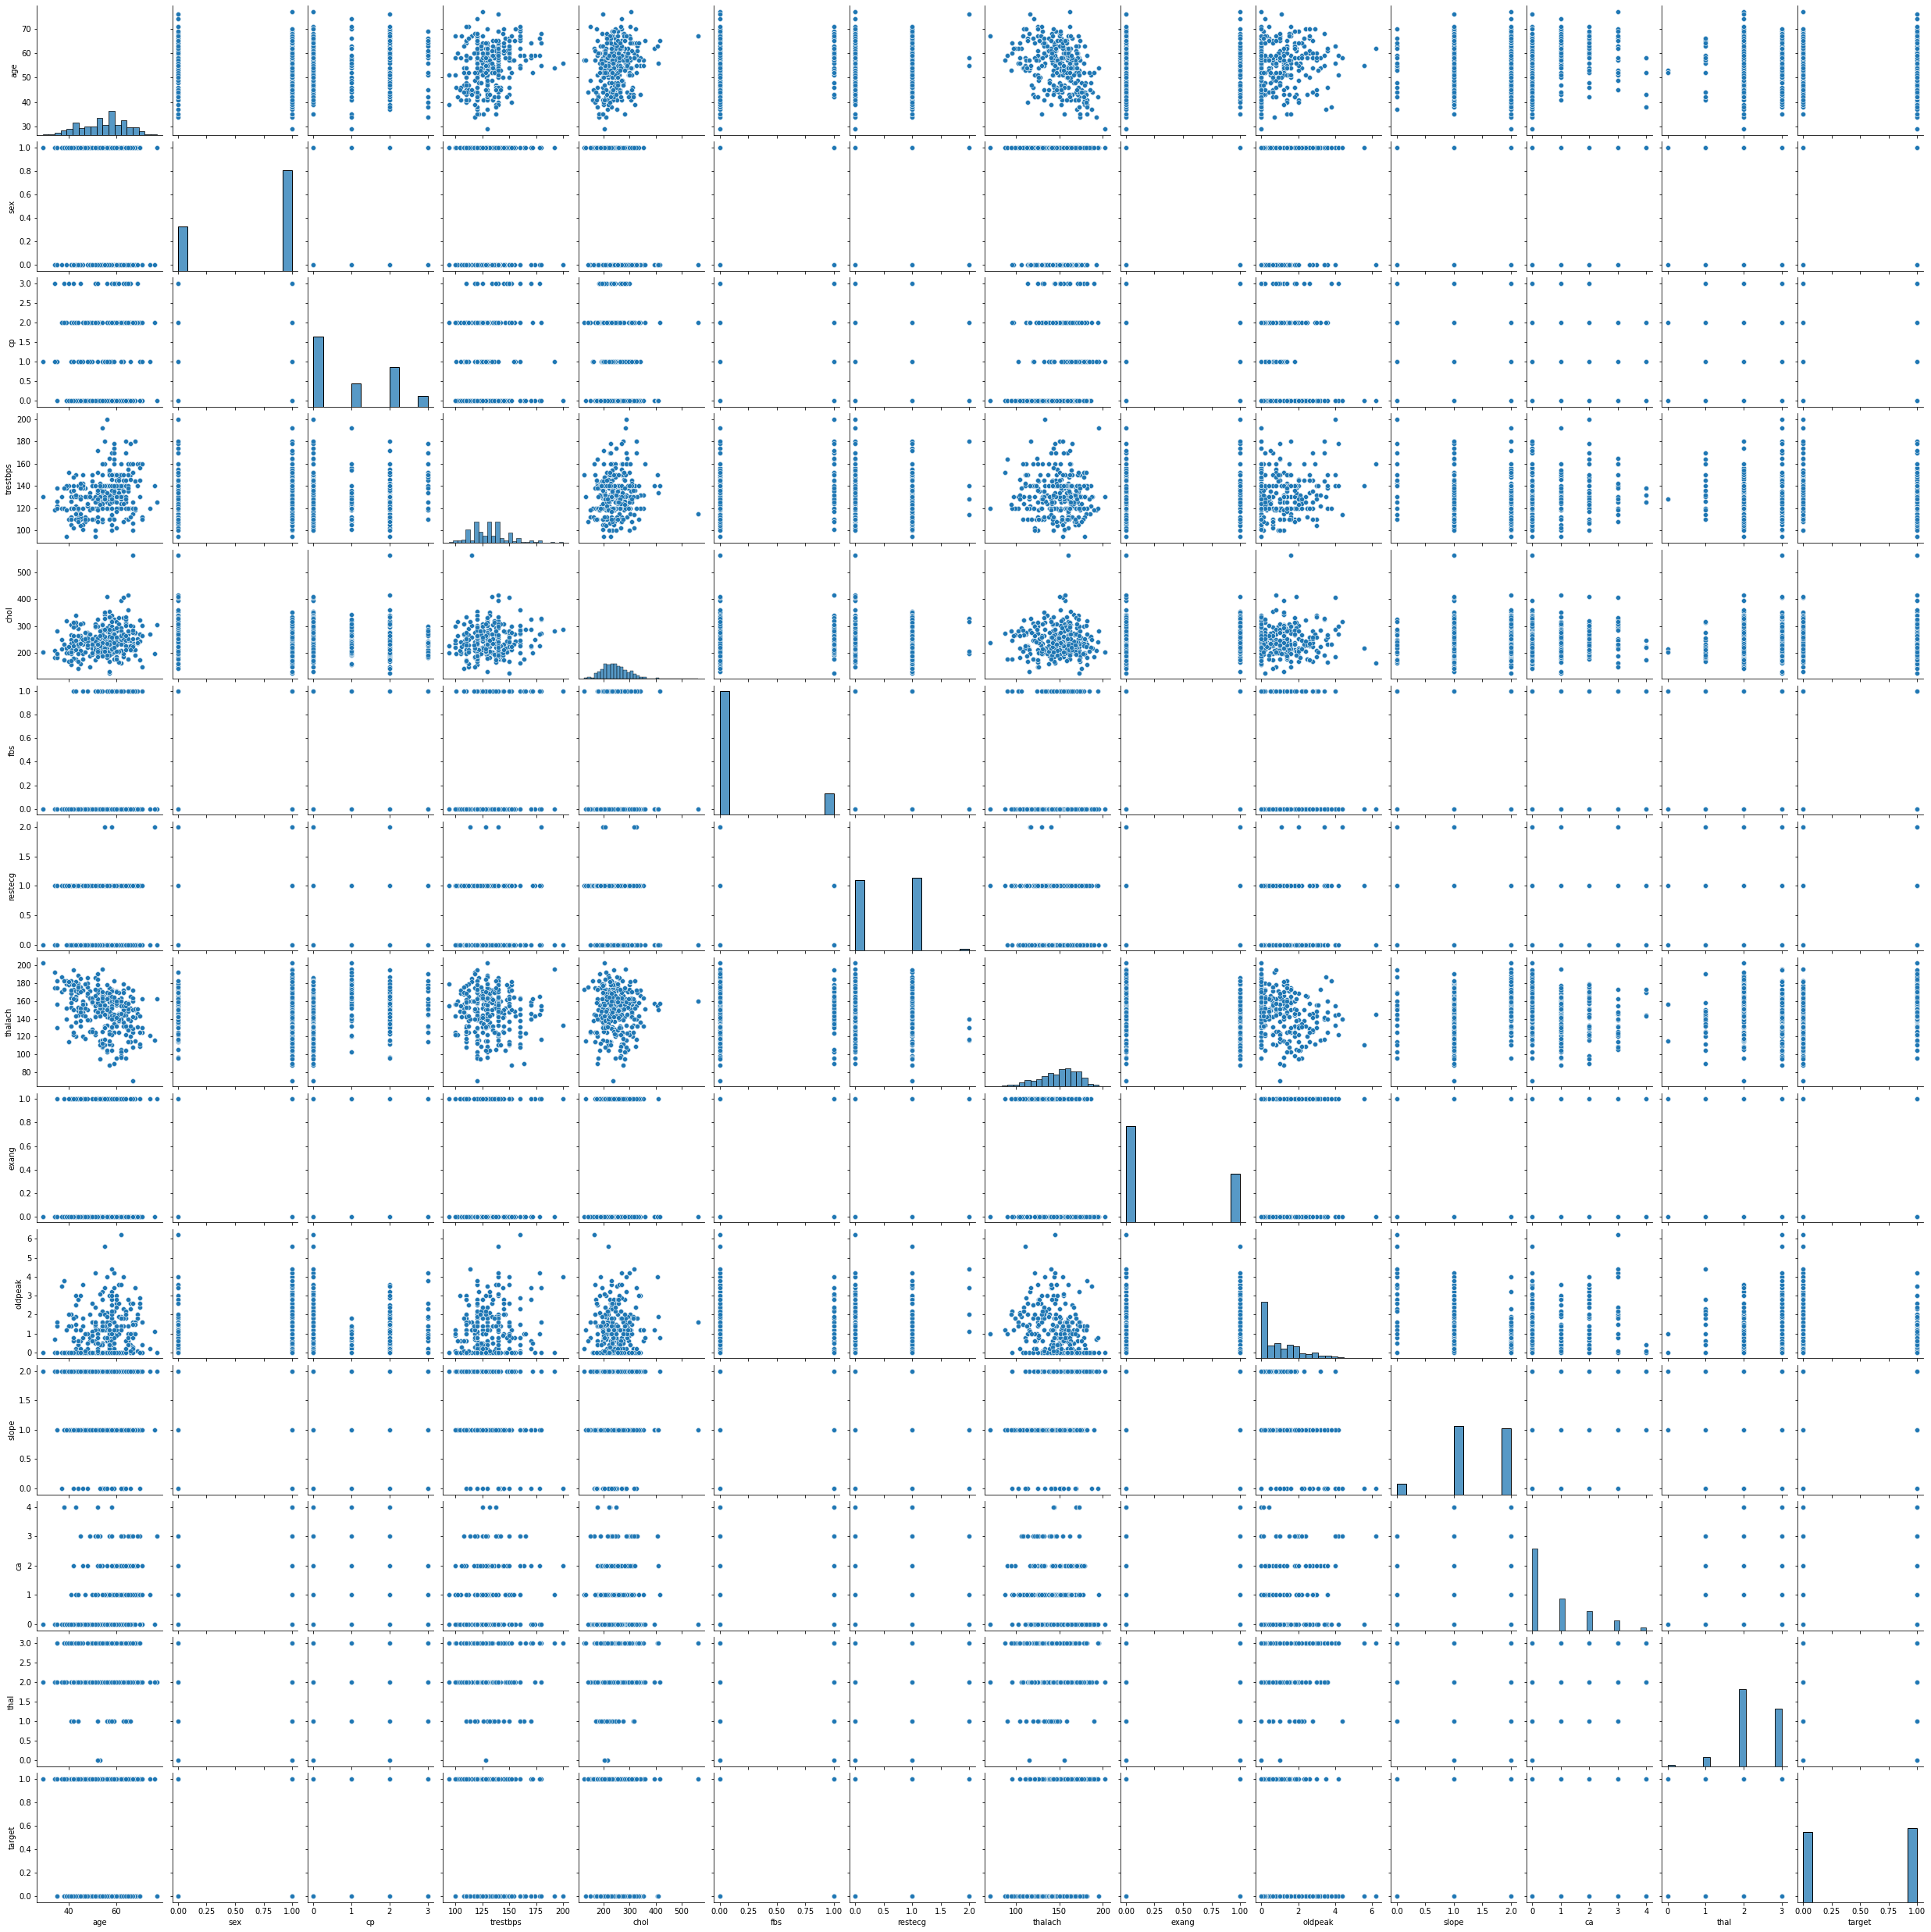

In [9]:
import seaborn as sns
sns.pairplot(data)

In [10]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

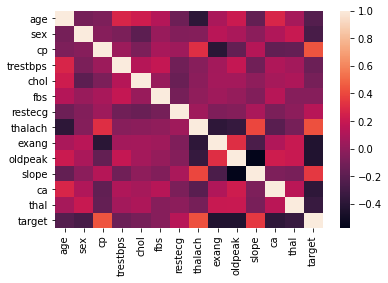

In [11]:
sns.heatmap(data.corr())

<Axes: xlabel='target', ylabel='count'>

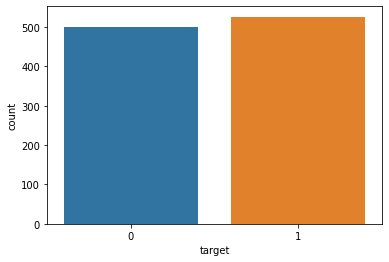

In [17]:
sns.countplot(data['target'])

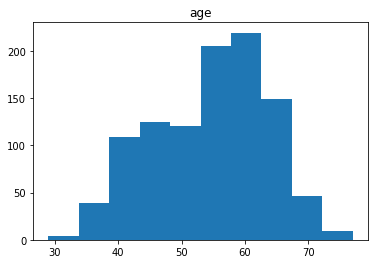

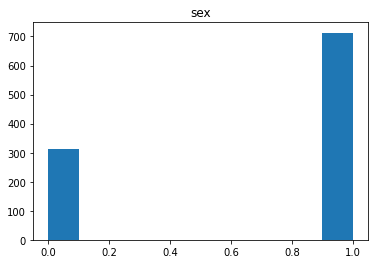

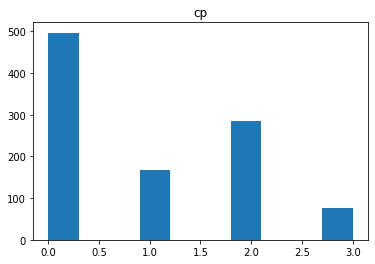

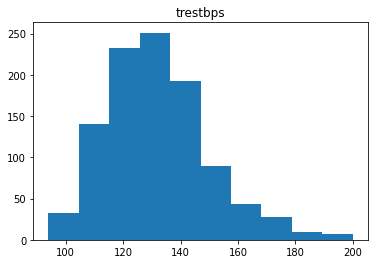

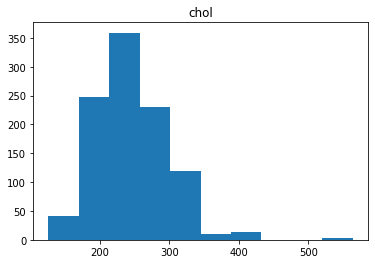

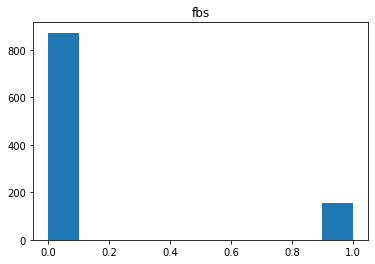

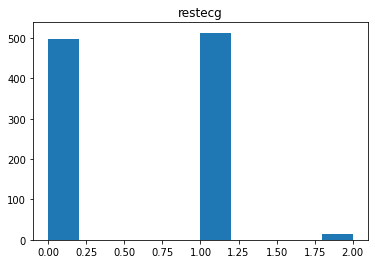

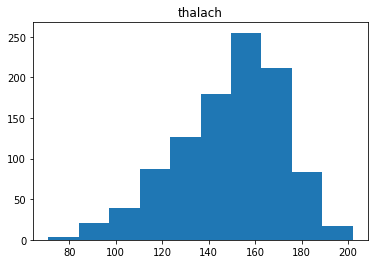

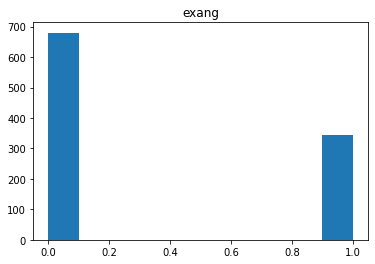

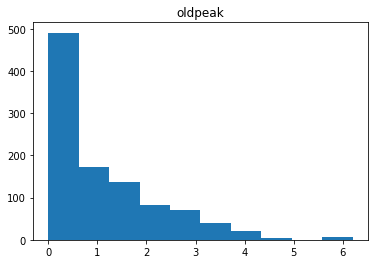

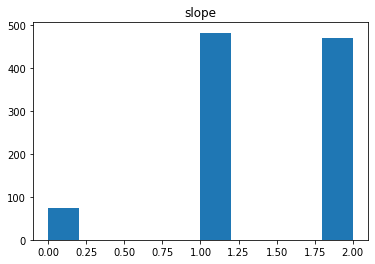

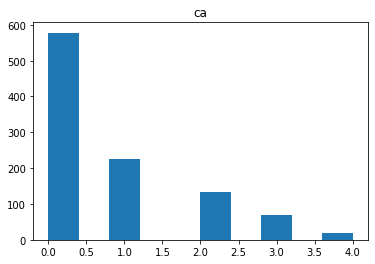

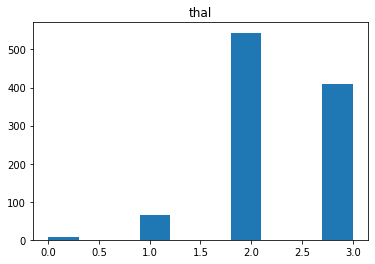

In [20]:
f = data.columns.drop('target')
for i in f:
    plt.hist(data[i], bins = 10, label = i)
    plt.title(i)
    plt.show()

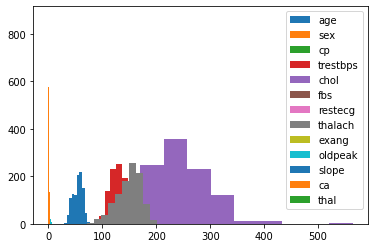

In [23]:
f = data.columns.drop('target')
for i in f:
    
    plt.hist(data[i], bins = 10, label = i)
    plt.legend()

In [24]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.metrics import classification_report as cr
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

print('Classification report for Logistic Regression:\n', cr(y_test, y_pred))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       159
           1       0.77      0.88      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



In [27]:
nb = GaussianNB().fit(X_train, y_train)
y_pred= nb.predict(X_test)

print('Classification report for Naive Bayes:\n', cr(y_test, y_pred))

Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308



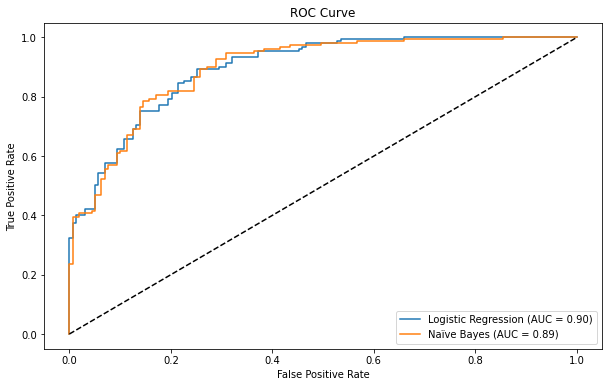

In [30]:
y_pred_prob_model = model.predict_proba(X_test)[:, 1]
fpr_model, tpr_model, thresholds_model = roc_curve(y_test, y_pred_prob_model)
auc_model = auc(fpr_model, tpr_model)

y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_model, tpr_model, label=f'Logistic Regression (AUC = {auc_model:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[118  41]
 [ 16 133]]


<Axes: >

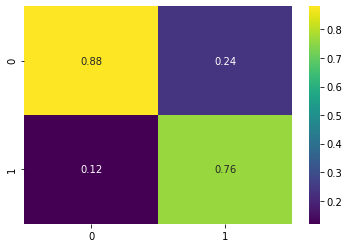

In [33]:
sns.heatmap(cf_matrix/sum(cf_matrix), annot = True, cmap = 'viridis')

In [34]:
accuracy_model = accuracy_score(y_test, y_pred)
precision_model = precision_score(y_test, y_pred)
recall_model = recall_score(y_test, y_pred)
f1_model = f1_score(y_test, y_pred)
conf_matrix_model = confusion_matrix(y_test, y_pred)

accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
conf_matrix_nb = confusion_matrix(y_test, y_pred)

In [38]:
print("Logistic Regression Interpretation:")
print(f"The model correctly classified {accuracy_model * 100:.2f}% of the test samples.")
print(f"Precision: {precision_model:.2f} (Low false positive rate)")
print(f"Recall: {recall_model:.2f} (Low false negative rate)")
print(f"F1-Score: {f1_model:.2f} (Balanced precision and recall)")
print(f"Confusion Matrix: Only {conf_matrix_model[0, 1] + conf_matrix_model[1, 0]} misclassified cases.")

print("\nNaïve Bayes Interpretation:")
print(f"The model correctly classified {accuracy_nb * 100:.2f}% of the test samples.")
print(f"Precision: {precision_nb:.2f} (Low false positive rate)")
print(f"Recall: {recall_nb:.2f} (Low false negative rate)")
print(f"F1-Score: {f1_nb:.2f} (Balanced precision and recall)")
print(f"Confusion Matrix: Only {conf_matrix_nb[0, 1] + conf_matrix_nb[1, 0]} misclassified cases.")

Logistic Regression Interpretation:
The model correctly classified 81.49% of the test samples.
Precision: 0.76 (Low false positive rate)
Recall: 0.89 (Low false negative rate)
F1-Score: 0.82 (Balanced precision and recall)
Confusion Matrix: Only 57 misclassified cases.

Naïve Bayes Interpretation:
The model correctly classified 81.49% of the test samples.
Precision: 0.76 (Low false positive rate)
Recall: 0.89 (Low false negative rate)
F1-Score: 0.82 (Balanced precision and recall)
Confusion Matrix: Only 57 misclassified cases.


In [39]:
macro_avg_nb = (precision_nb + recall_nb) / 2
weighted_avg_nb = (precision_nb * len(y_test[y_test == 1]) + recall_nb * len(y_test[y_test == 0])) / len(y_test)

print("\nNaïve Bayes Macro and Weighted Averages:")
print(f"Macro Average: {macro_avg_nb:.2f}")
print(f"Weighted Average: {weighted_avg_nb:.2f}")


Naïve Bayes Macro and Weighted Averages:
Macro Average: 0.83
Weighted Average: 0.83
